<a href="https://colab.research.google.com/github/vivek16pawar/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import plotly.express as px
from datetime import datetime
import datetime as dt

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

import math
from math import log1p, sqrt 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Module 4/Customers Segmentation/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [7]:
df.shape

(541909, 8)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(536641, 8)

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(401604, 8)

In [13]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [14]:
df["Cancelled_trans"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.Cancelled_trans.value_counts() / df.shape[0] * 100

False    97.790859
True      2.209141
Name: Cancelled_trans, dtype: float64

In [15]:
df = df.loc[df.Cancelled_trans == False].copy()
df = df.drop('Cancelled_trans',axis = 1)

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
df['Amount_spent'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.Amount_spent.describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: Amount_spent, dtype: float64

In [20]:
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour
df['Minutes']=df['InvoiceDate'].dt.minute
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [21]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['Day_of_week'] = df['Day_of_week'].apply(lambda x: days[x])

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,26,Weds
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds


## Exploratory Data Analysis

In [23]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


In [24]:
df.Country.nunique()

37

In [25]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(20,5))
px.bar(country_counts ,x = country_counts.index, y = country_counts.values,log_y=True,
       labels={
                     "y": "Transactions",
                     "index": "Countries",
                 },
       title="Which countries made the most transactions?")

<Figure size 1440x360 with 0 Axes>

In [26]:
# Create feature which indicates inside or outside UK
df["UK"] = np.where(df.Country == "United Kingdom", 1, 0)

In [27]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds,1


Text(0.5, 1.0, 'Yearly Transactions Count')

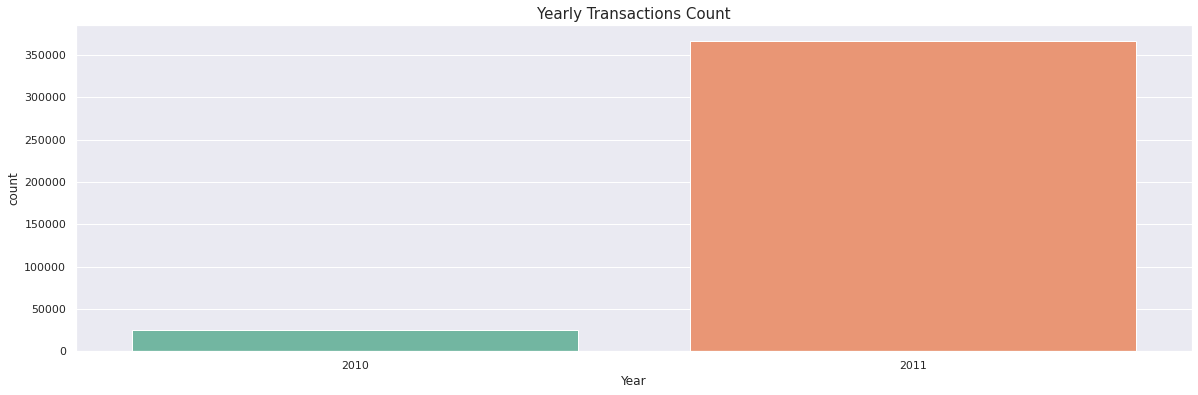

In [28]:
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')
sns.countplot(df.Year,palette='Set2')
plt.title('Yearly Transactions Count',fontsize=15)

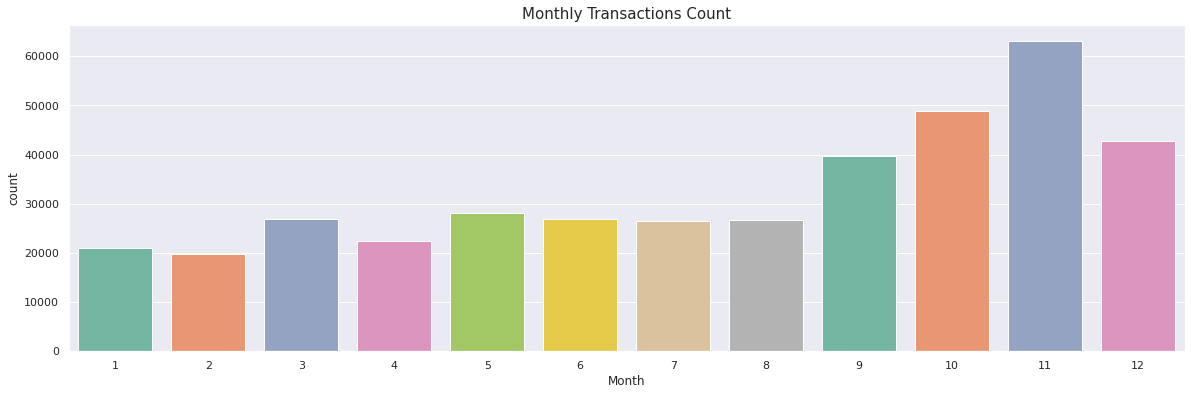

In [29]:
plt.figure(figsize = (20,6))
sns.countplot(df.Month, palette='Set2')
plt.title('Monthly Transactions Count',fontsize=15);

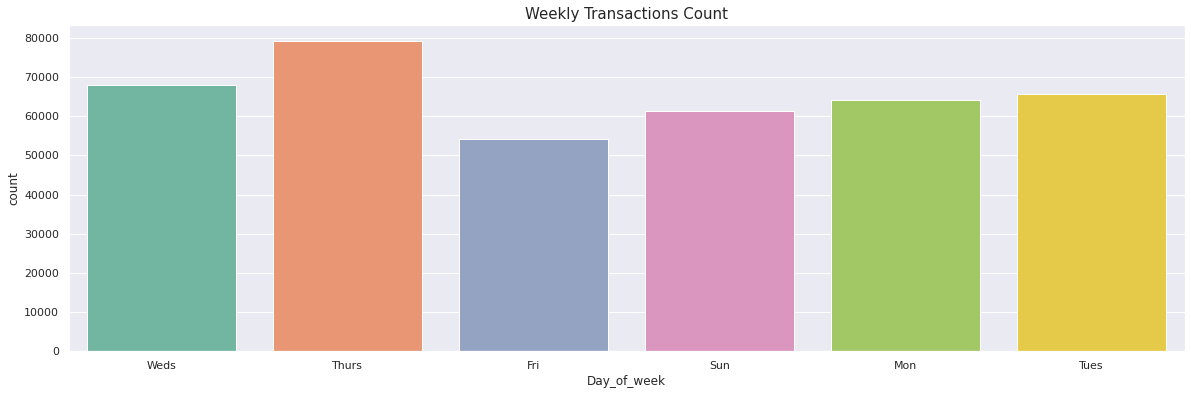

In [30]:
plt.figure(figsize = (20,6))
sns.countplot(df.Day_of_week, palette='Set2')
plt.title('Weekly Transactions Count',fontsize=15);

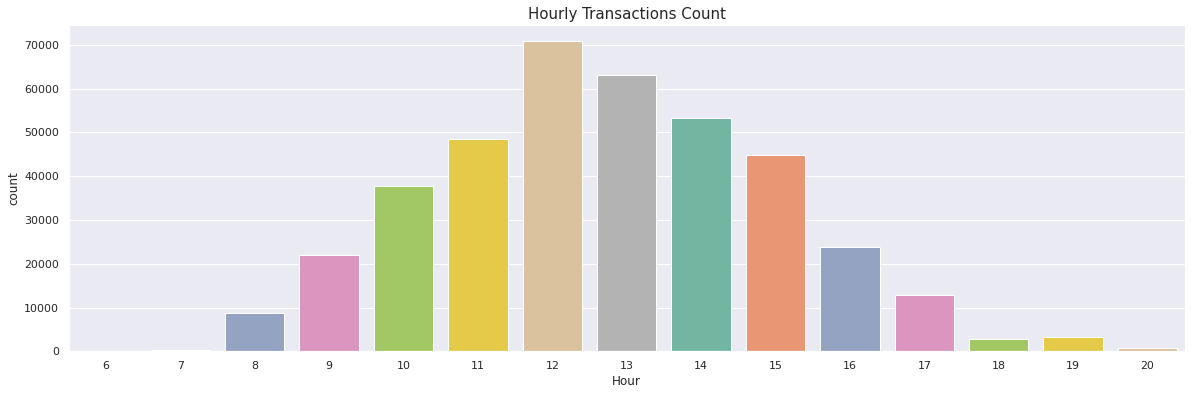

In [31]:
plt.figure(figsize = (20,6))
sns.countplot(df.Hour, palette='Set2')
plt.title('Hourly Transactions Count',fontsize=15);

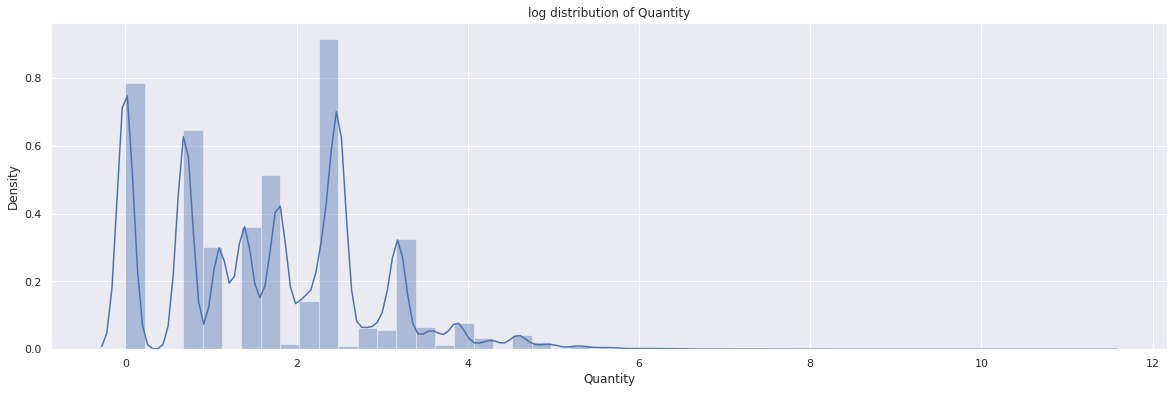

In [32]:
plt.figure(figsize=(20,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

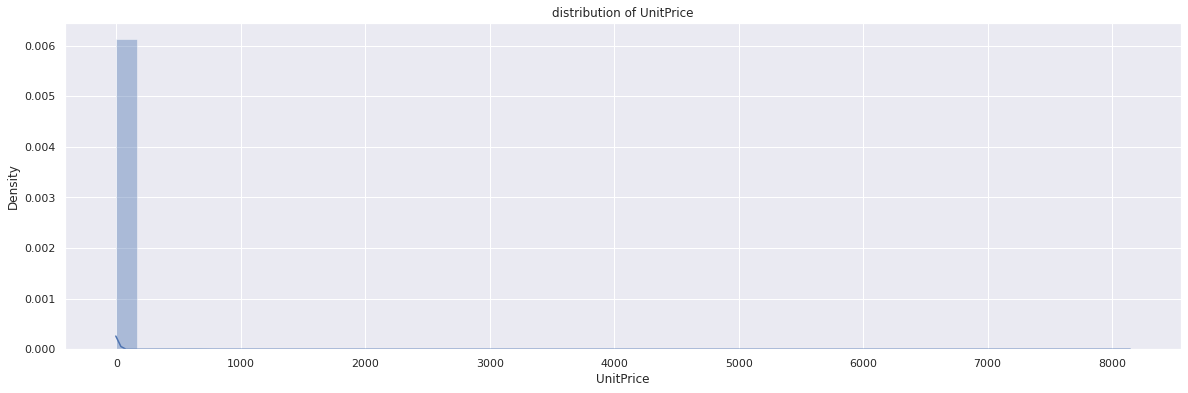

In [33]:
plt.figure(figsize=(20,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B");

## Prepare Data

As customer clusters may vary by geography, I’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [34]:
# Restricting analysis to UK
retail_uk = df[df['Country']=='United Kingdom']
#check the shape
retail_uk.shape

(349227, 16)

In [35]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
retail_uk = retail_uk[retail_uk['InvoiceDate']>= "2010-12-09"]
retail_uk.shape

(337670, 16)

In [36]:
pd.DataFrame([{'products': len(retail_uk['StockCode'].value_counts()),    
               'transactions': len(retail_uk['InvoiceNo'].value_counts()),
               'customers': len(retail_uk['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3611,16017,3863


In [37]:
df['CustomerID'] = df['CustomerID'].astype('int64')

## RFM Analysis

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.

### Recency

In [38]:
#last date available in our dataset
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

The last date we have is 2011-12-09 so we will use it as reference.

In [39]:
# Taking last date as reference
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [40]:
# Creating new coumn containing only date
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [41]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,47.4,2010,12,9,8,34,Thurs,1,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,37.2,2010,12,9,8,34,Thurs,1,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,15.3,2010,12,9,8,34,Thurs,1,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,31.8,2010,12,9,8,34,Thurs,1,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,15.9,2010,12,9,8,34,Thurs,1,2010-12-09


In [42]:
# Creating recency dataframe
recency = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurshaceDate']
recency.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [43]:
recency.shape

(3863, 2)

In [44]:
#calculating recency
recency['Recency'] = recency['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [45]:
recency.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [46]:
#droping LastPurchaseDate 
recency.drop('LastPurshaceDate',axis=1,inplace=True)

### Frequency

In [47]:
#calculate frequency of purchases
frequency = retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,96
2,12748.0,4063
3,12749.0,199
4,12820.0,59


### Monetary

In [48]:
# Amount Spent Columns
retail_uk.Amount_spent

19632      47.4
19633      37.2
19634      15.3
19635      31.8
19636      15.9
          ...  
541889     23.4
541890     23.6
541891     30.0
541892    214.8
541893     70.8
Name: Amount_spent, Length: 337670, dtype: float64

In [49]:
# Creating Monetary Column
monetary = retail_uk.groupby(by='CustomerID',as_index=False).agg({'Amount_spent': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,3837.45
2,12748.0,31217.94
3,12749.0,4090.88
4,12820.0,942.34


In [50]:
#merge recency with frequency 
rf_merge = recency.merge(frequency,on='CustomerID')
rf_merge.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,96
2,12748.0,0,4063
3,12749.0,3,199
4,12820.0,3,59


In [51]:
#merge with monetary dataframe to get a table with the 3 columns
rfm = rf_merge.merge(monetary,on='CustomerID')

### RFM Quartiles

In [52]:
# assign a score from 1 to 4 to Recency, Frequency and Monetary
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14200.0,17.0,17.0,293.05
0.50,15561.0,49.0,40.0,639.02
0.75,16911.0,134.0,96.0,1548.75


In [53]:
# convert to dict
quantiles.to_dict()

{'CustomerID': {0.25: 14200.0, 0.5: 15561.0, 0.75: 16911.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 96.0},
 'Monetary': {0.25: 293.05, 0.5: 639.02, 0.75: 1548.75},
 'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 134.0}}

### Creation of RFM Segments

In [54]:
# RScore creation
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [55]:
# FM Score creation
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [56]:
#create rfm segmentation 
segmentation = rfm

In [57]:
# Creating Recency Quartile
segmentation['R_Quartile'] = segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))

In [58]:
# Creating Frequency Quartile
segmentation['F_Quartile'] = segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))

In [59]:
# Creating Monetary Quartile
segmentation['M_Quartile'] = segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [60]:
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,325,1,77183.60,1,1,4
1,12747.0,2,96,3837.45,4,3,4
2,12748.0,0,4063,31217.94,4,4,4
3,12749.0,3,199,4090.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [61]:
segmentation.shape

(3863, 7)

In [62]:
#  Adding all quartile to create rfm score
segmentation['RFM Group'] = segmentation.R_Quartile.map(str) \
                            + segmentation.F_Quartile.map(str) \
                            + segmentation.M_Quartile.map(str)
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group
0,12346.0,325,1,77183.60,1,1,4,114
1,12747.0,2,96,3837.45,4,3,4,434
2,12748.0,0,4063,31217.94,4,4,4,444
3,12749.0,3,199,4090.88,4,4,4,444
4,12820.0,3,59,942.34,4,3,3,433


In [63]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
segmentation['RFMScore'] = segmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12747.0,2,96,3837.45,4,3,4,434,11
2,12748.0,0,4063,31217.94,4,4,4,444,12
3,12749.0,3,199,4090.88,4,4,4,444,12
4,12820.0,3,59,942.34,4,3,3,433,10


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [64]:
# Getting our best customers
segmentation[segmentation['RFMScore']== 12].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group,RFMScore
3729,18102.0,0,414,233736.93,4,4,4,444,12
3272,17450.0,8,333,192361.95,4,4,4,444,12
3314,17511.0,2,920,87591.70,4,4,4,444,12
2731,16684.0,4,277,66653.56,4,4,4,444,12
894,14096.0,4,5111,65164.79,4,4,4,444,12
615,13694.0,3,562,64197.50,4,4,4,444,12
1752,15311.0,0,2282,59296.04,4,4,4,444,12
2087,15769.0,7,129,56160.92,4,4,4,444,12
188,13089.0,2,1773,55531.46,4,4,4,444,12
1034,14298.0,8,1637,51527.30,4,4,4,444,12


In [65]:
print("Best Customers: ",len(segmentation[segmentation['RFM Group']=='444']))
print('Loyal Customers: ',len(segmentation[segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(segmentation[segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(segmentation[segmentation['RFM Group']=='244']))
print('Lost Customers: ',len(segmentation[segmentation['RFM Group']=='144']))
print('Lost Cheap Customers: ',len(segmentation[segmentation['RFM Group']=='111']))

Best Customers:  404
Loyal Customers:  961
Big Spenders:  966
Almost Lost:  96
Lost Customers:  18
Lost Cheap Customers:  337


In [66]:
segmentation.drop(['R_Quartile', 'F_Quartile','M_Quartile'], axis=1,inplace = True)

## Model Preparation

Text(0.5, 0, 'Attributes')

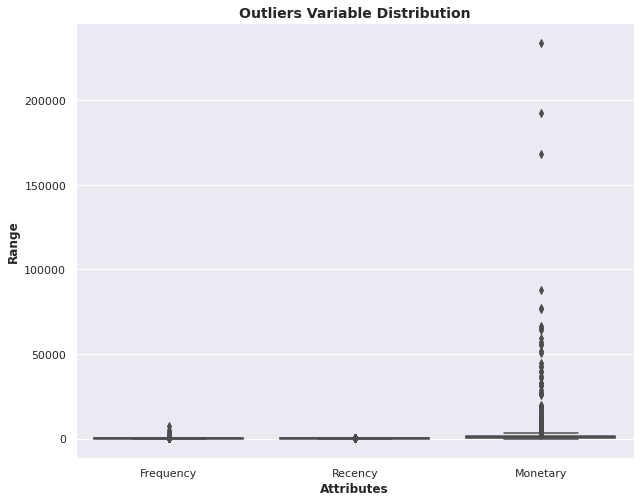

In [67]:
attributes = ['Frequency', 'Recency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmentation[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [68]:
# Removing (statistical) outliers for Amount
Q1 = segmentation['Monetary'].quantile(0.05)
Q3 = segmentation['Monetary'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Monetary'] >= Q1 - 1.5*IQR) & (segmentation['Monetary'] <= Q3 + 1.5*IQR)]

Q1 = segmentation['Frequency'].quantile(0.05)
Q3 = segmentation['Frequency'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Frequency'] >= Q1 - 1.5*IQR) & (segmentation['Frequency'] <= Q3 + 1.5*IQR)]


Q1 = segmentation['Recency'].quantile(0.05)
Q3 = segmentation['Recency'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Recency'] >= Q1 - 1.5*IQR) & (segmentation['Recency'] <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

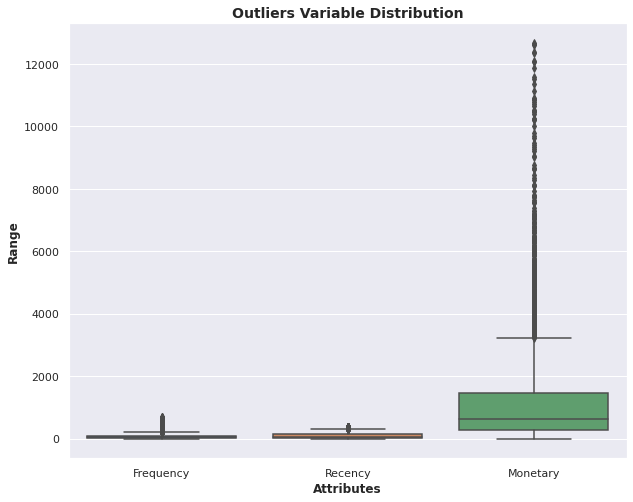

In [69]:
attributes = ['Frequency', 'Recency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmentation[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [70]:
#Handle negative and zero values
def neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply neg_n_zero function to Recency and Monetary columns 
segmentation['Recency'] = [neg_n_zero(x) for x in segmentation.Recency]
segmentation['Monetary'] = [neg_n_zero(x) for x in segmentation.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = segmentation[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

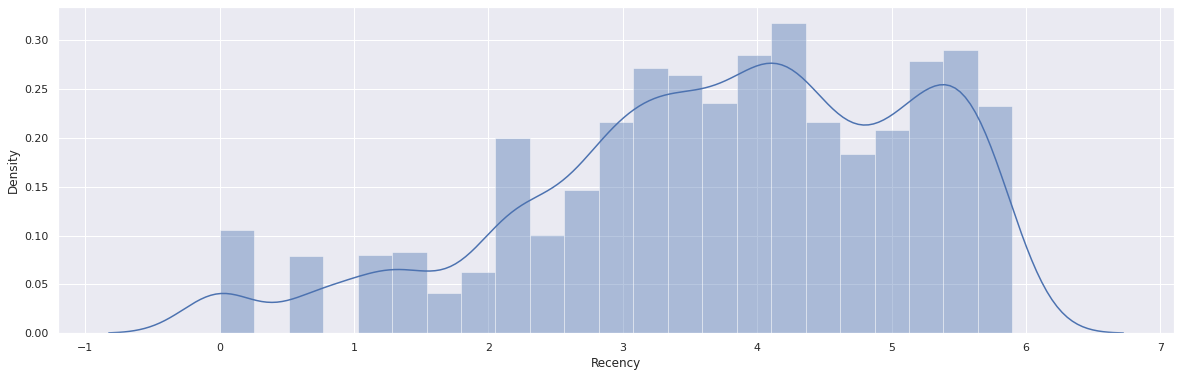

In [71]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(20,6))
sns.distplot(Recency_Plot);

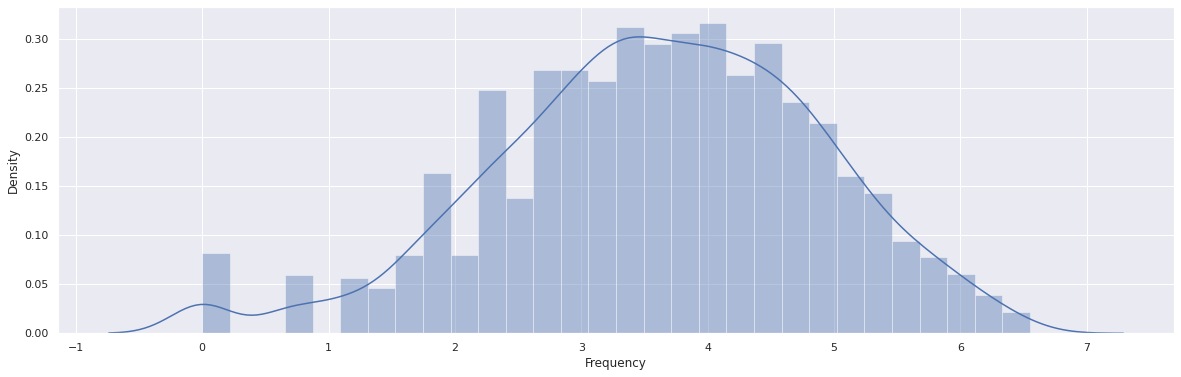

In [72]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(20,6))
sns.distplot(Frequency_Plot);

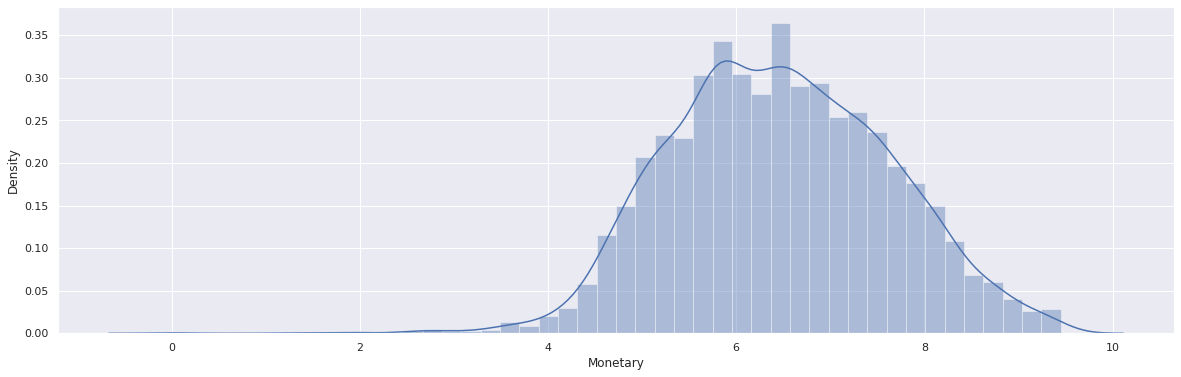

In [73]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(20,6))
sns.distplot(Monetary_Plot);

In [74]:
from sklearn import preprocessing
segmentation['Recency_log'] = segmentation['Recency'].apply(math.log)
segmentation['Frequency_log'] = segmentation['Frequency'].apply(math.log)
segmentation['Monetary_log'] = segmentation['Monetary'].apply(math.log)

## Model

- Applying Silhouette Score Method on Recency and Monetary

In [75]:
# Scaling input data 
features_rm=['Recency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [76]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4170556947071824
For n_clusters = 3, silhouette score is 0.347082778358805
For n_clusters = 4, silhouette score is 0.36437443165186095
For n_clusters = 5, silhouette score is 0.3425484478897032
For n_clusters = 6, silhouette score is 0.3495223683552277
For n_clusters = 7, silhouette score is 0.35128549605058756
For n_clusters = 8, silhouette score is 0.3424876448442069
For n_clusters = 9, silhouette score is 0.349115019901884
For n_clusters = 10, silhouette score is 0.34071169836322934
For n_clusters = 11, silhouette score is 0.3470975957010933
For n_clusters = 12, silhouette score is 0.34952224806643684
For n_clusters = 13, silhouette score is 0.34950559631539135
For n_clusters = 14, silhouette score is 0.3500055531761584
For n_clusters = 15, silhouette score is 0.34463121522766355


- Applying Elbow Method on Recency and Monetary

In [77]:
# Scaling input data for silhouette score
features_rm=['Recency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

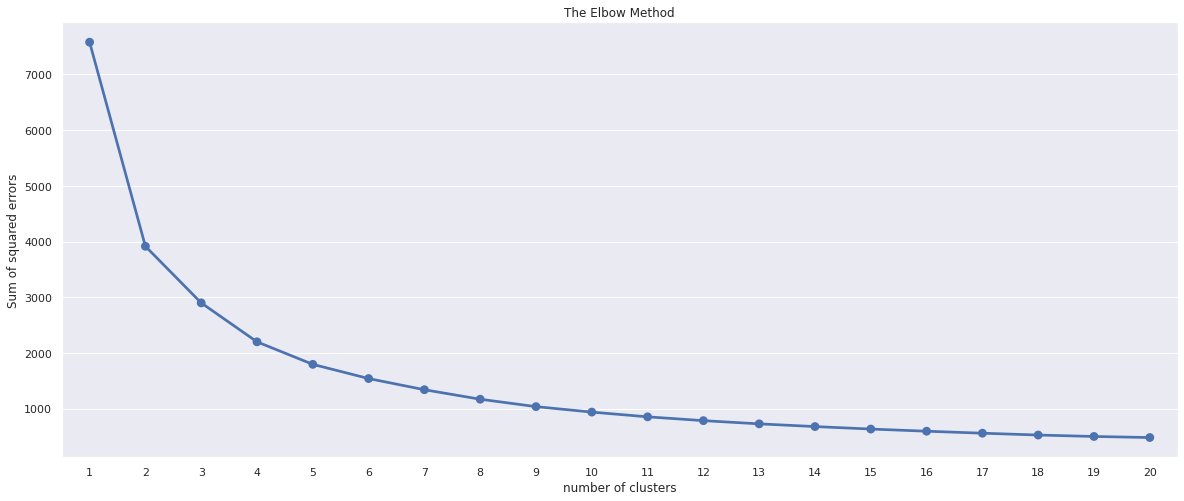

In [78]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [79]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

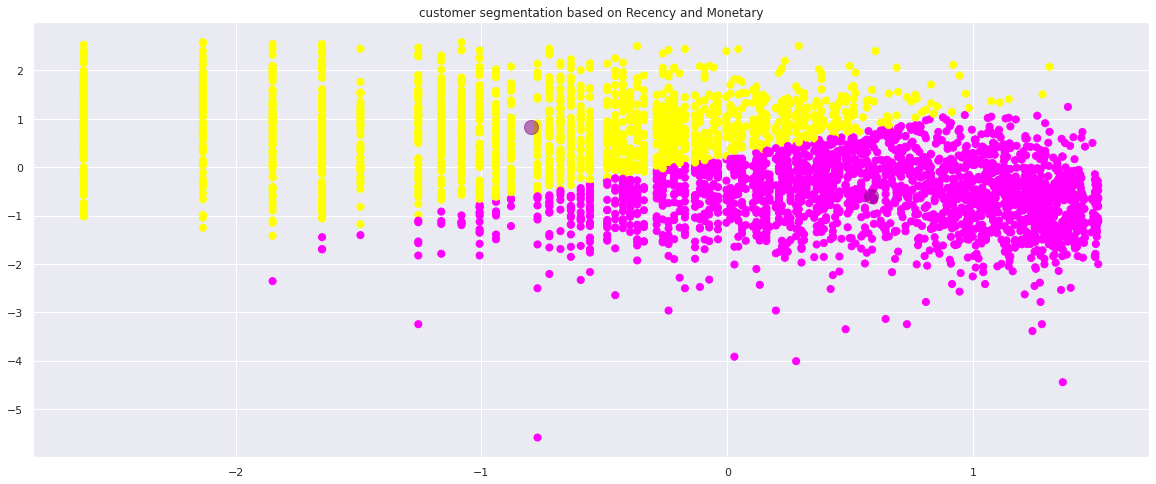

In [80]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

- Applying Silhouette Score Method on Frequency and Monetary

In [81]:
# Scaling input data 
features_rm=['Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [82]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4816425935736115
For n_clusters = 3, silhouette score is 0.40928015141783175
For n_clusters = 4, silhouette score is 0.37057727068328333
For n_clusters = 5, silhouette score is 0.33939489043838666
For n_clusters = 6, silhouette score is 0.3642229815054755
For n_clusters = 7, silhouette score is 0.34067165867321064
For n_clusters = 8, silhouette score is 0.3496657634683131
For n_clusters = 9, silhouette score is 0.3596711796579546
For n_clusters = 10, silhouette score is 0.350074058059237
For n_clusters = 11, silhouette score is 0.3594355244403769
For n_clusters = 12, silhouette score is 0.36361497347505967
For n_clusters = 13, silhouette score is 0.370987079410238
For n_clusters = 14, silhouette score is 0.3586204874953122
For n_clusters = 15, silhouette score is 0.35370737176501366


- Applying Elbow Method on Frequency and Monetary

In [83]:
# Scaling input data for silhouette score
features_rm=['Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

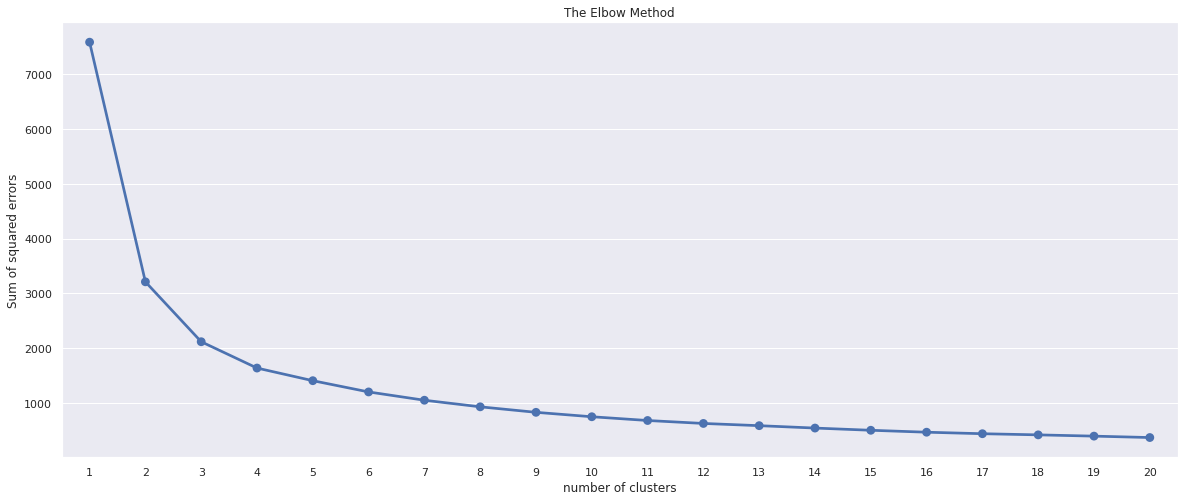

In [84]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [85]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

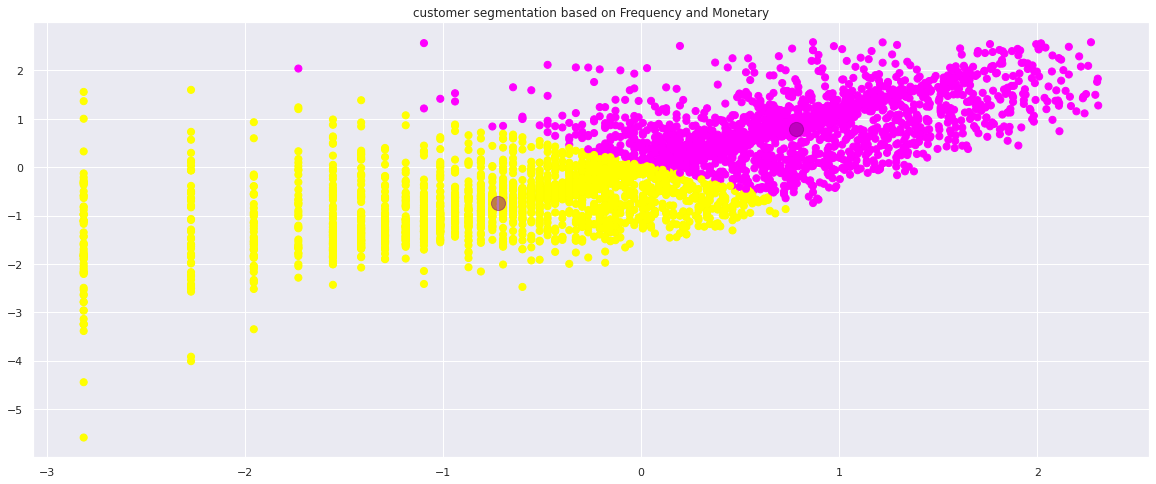

In [86]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

- Applying silhouette score method on Recency, Frequency and Monetary

In [87]:
# Scaling input data for silhouette score
features_rm=['Recency_log','Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [88]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3928848467593723
For n_clusters = 3, silhouette score is 0.2928133851421312
For n_clusters = 4, silhouette score is 0.29624107203772315
For n_clusters = 5, silhouette score is 0.2813660175811197
For n_clusters = 6, silhouette score is 0.260512431396849
For n_clusters = 7, silhouette score is 0.2643281370000535
For n_clusters = 8, silhouette score is 0.2681967843578625
For n_clusters = 9, silhouette score is 0.2764197317175047
For n_clusters = 10, silhouette score is 0.2773455883541874
For n_clusters = 11, silhouette score is 0.2686593058494171
For n_clusters = 12, silhouette score is 0.2645666953689794
For n_clusters = 13, silhouette score is 0.26217543055432785
For n_clusters = 14, silhouette score is 0.2596383606349506
For n_clusters = 15, silhouette score is 0.2548106748400866


For n_clusters = 2 The average silhouette_score is : 0.3928848467593723
For n_clusters = 3 The average silhouette_score is : 0.29294987109092346
For n_clusters = 4 The average silhouette_score is : 0.2958789311793881
For n_clusters = 5 The average silhouette_score is : 0.281413537214285
For n_clusters = 6 The average silhouette_score is : 0.258489444757559
For n_clusters = 7 The average silhouette_score is : 0.265484321239893
For n_clusters = 8 The average silhouette_score is : 0.2692638545049555
For n_clusters = 9 The average silhouette_score is : 0.27786097838102575
For n_clusters = 10 The average silhouette_score is : 0.27631647667453824


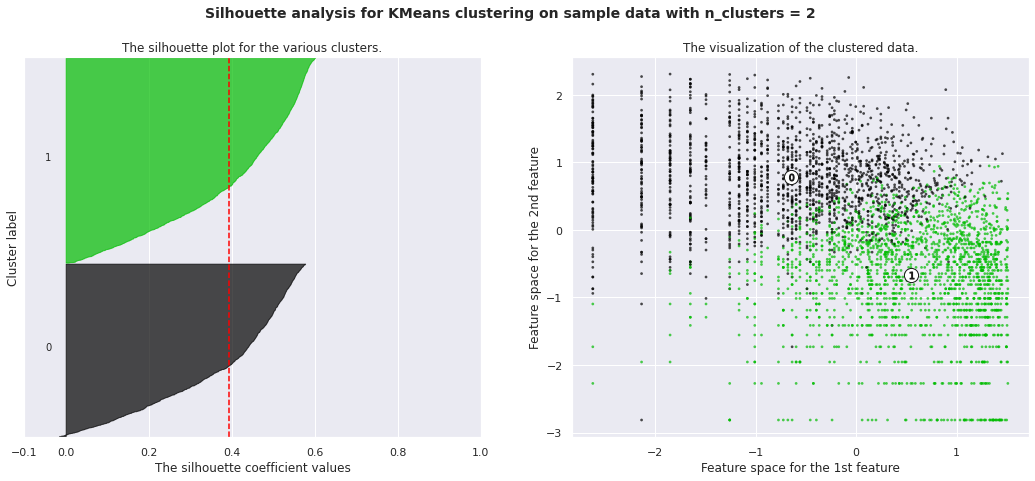

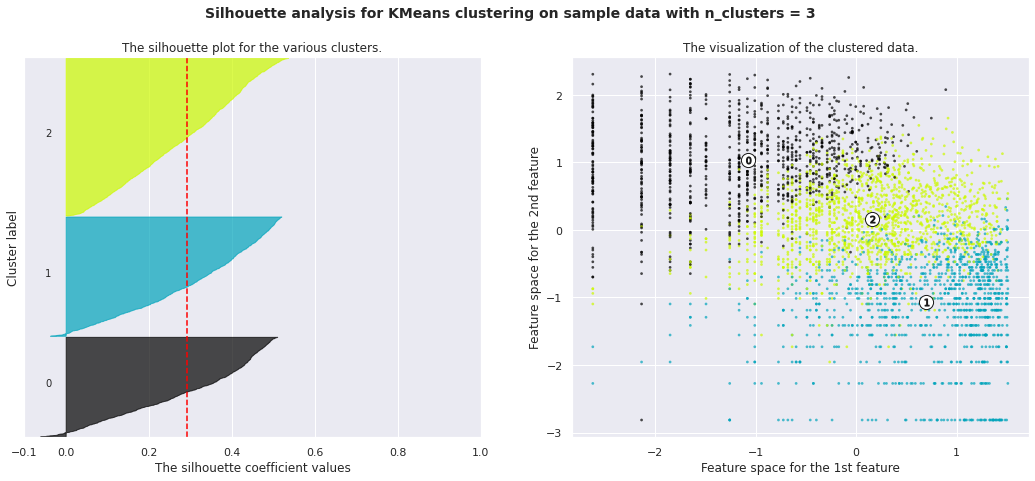

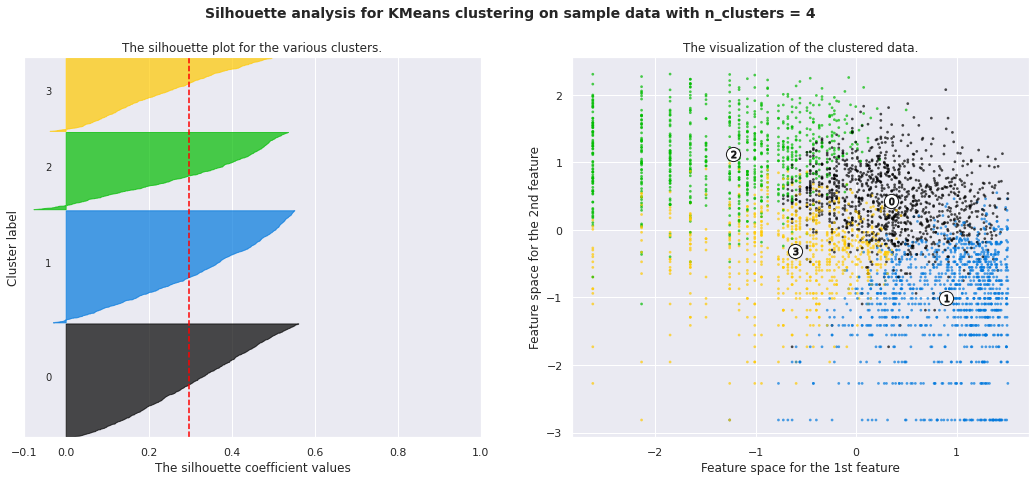

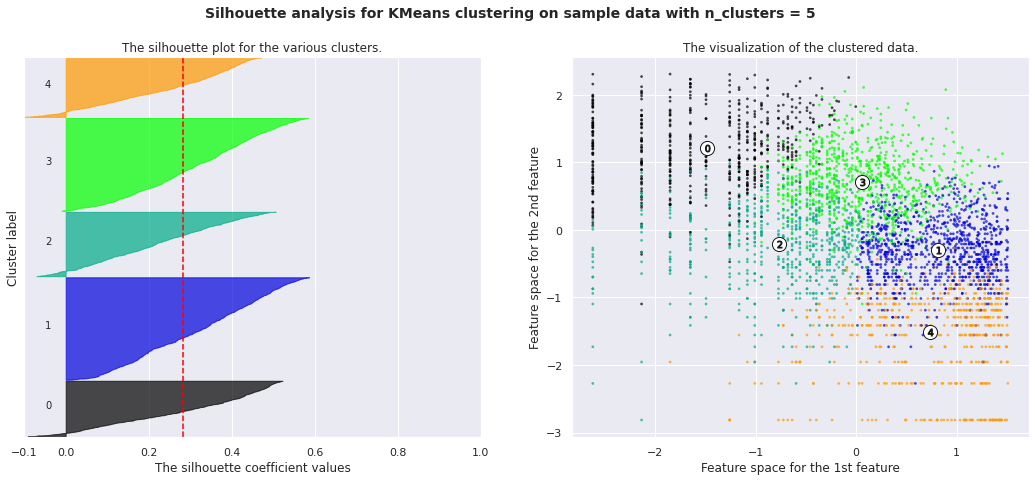

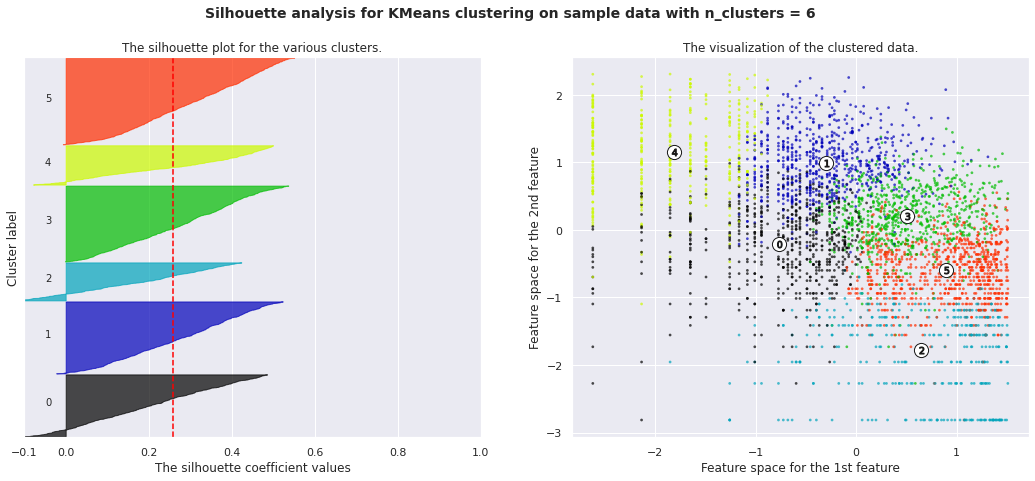

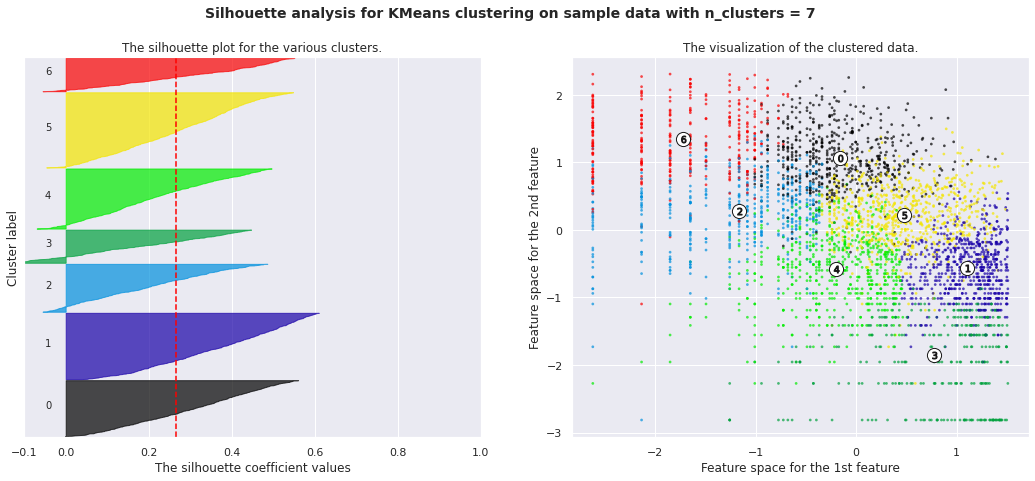

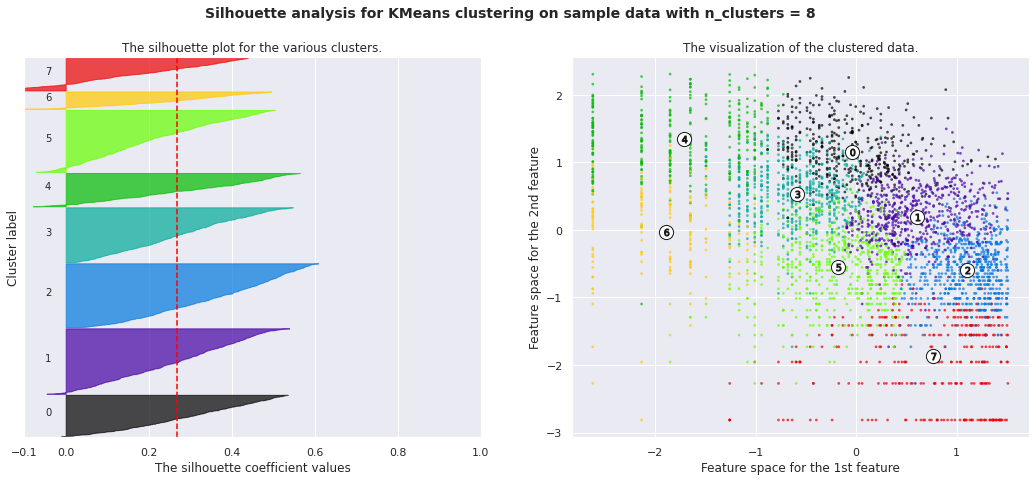

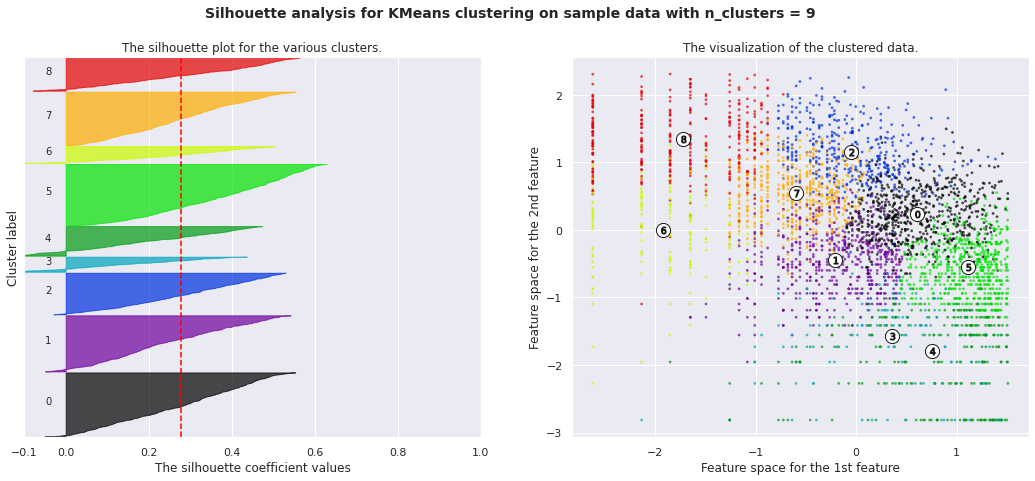

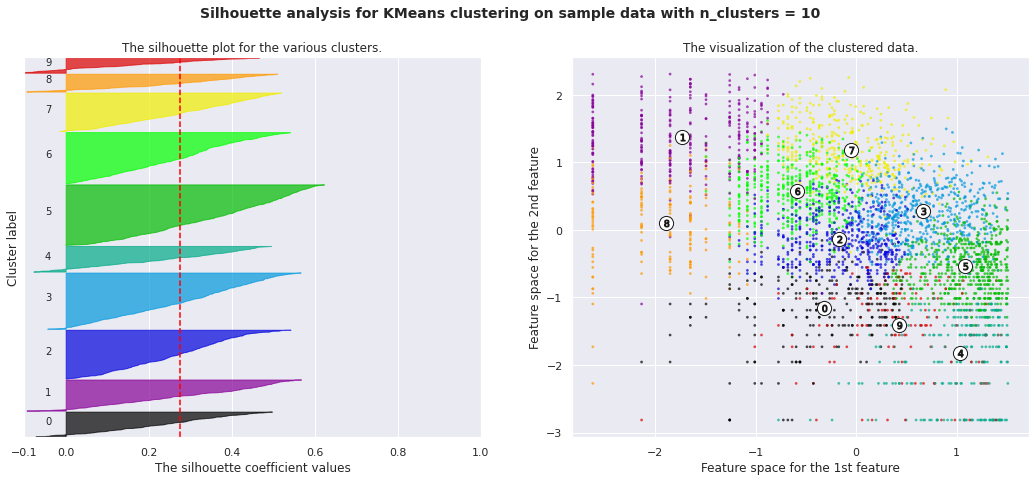

In [89]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,max_iter = 50)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

- Applying Elbow method on Recency, Frequency and Monetary

In [90]:
# Scaling input data for Elbow Method
features_rm=['Recency_log','Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

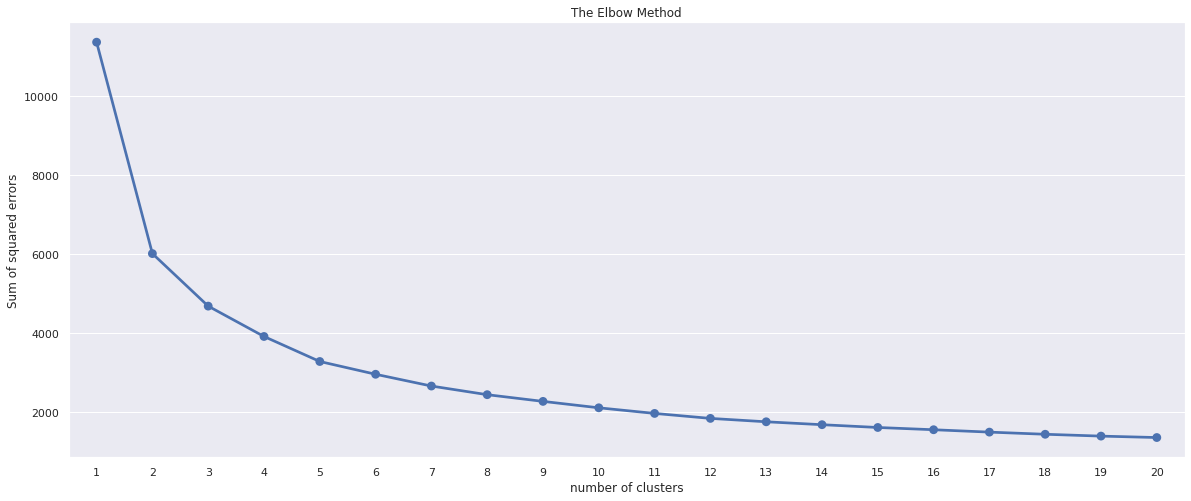

In [91]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [92]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

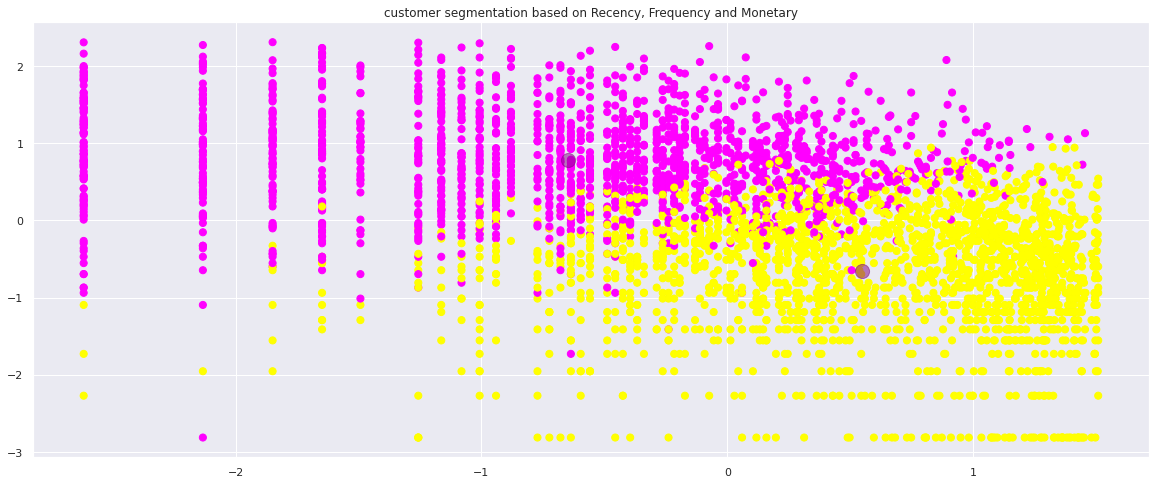

In [93]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

In [94]:
# Creating Cluster Number column
segmentation['ClusterNo'] = kmeans.labels_

In [95]:
# Getting first 5 rows of segmentation
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0
3,12749.0,3,199,4090.88,444,12,1.098612,5.293305,8.316515,0
4,12820.0,3,59,942.34,433,10,1.098612,4.077537,6.848366,0
5,12821.0,214,6,92.72,111,3,5.365976,1.791759,4.529584,1
6,12822.0,70,46,948.88,233,8,4.248495,3.828641,6.855282,0


In [96]:
# Value count how many customers are present in each cluster
segmentation['ClusterNo'].value_counts()

1    2055
0    1735
Name: ClusterNo, dtype: int64

In [97]:
# Merging segmenatation and main dataframe
merge_df = segmentation.merge(df,on='CustomerID')
merge_df.head()

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,...,UnitPrice,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0,...,2.55,United Kingdom,30.60,2010,12,5,15,38,Sun,1
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0,...,2.55,United Kingdom,15.30,2010,12,5,15,38,Sun,1
2,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0,...,1.69,United Kingdom,27.04,2010,12,5,15,38,Sun,1
3,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0,...,1.65,United Kingdom,39.60,2010,12,5,15,38,Sun,1
4,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0,...,5.45,United Kingdom,32.70,2010,12,5,15,38,Sun,1


## Cluster 0 Analysis

In [98]:
# Getting rows with cluster 0
segmentation[segmentation['ClusterNo']==0]

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,0
3,12749.0,3,199,4090.88,444,12,1.098612,5.293305,8.316515,0
4,12820.0,3,59,942.34,433,10,1.098612,4.077537,6.848366,0
6,12822.0,70,46,948.88,233,8,4.248495,3.828641,6.855282,0
9,12826.0,2,91,1474.72,433,10,0.693147,4.510860,7.296223,0
...,...,...,...,...,...,...,...,...,...,...
3844,18259.0,24,35,1962.30,324,9,3.178054,3.555348,7.581873,0
3845,18260.0,172,133,2628.35,144,9,5.147494,4.890349,7.874112,0
3848,18263.0,25,61,1213.16,333,9,3.218876,4.110874,7.100984,0
3852,18272.0,2,166,3078.58,444,12,0.693147,5.111988,8.032224,0


In [99]:
# reset index of merge dataframe
temp = merge_df.reset_index()

In [100]:
# customer id of cluster 0
cust0 = list(temp[temp['ClusterNo']==0]['CustomerID'])

In [101]:
# Cluster 0 info
cluster0 = merge_df[merge_df['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice','Amount_spent', 'Frequency', 'Recency'
         , 'Monetary']].mean()

Quantity           9.859101
UnitPrice          2.872876
Amount_spent      16.404743
Frequency        230.002036
Recency           28.683747
Monetary        3070.075125
dtype: float64

In [102]:
cluster0.describe()

,CustomerID,Recency,Frequency,Monetary,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,Quantity,UnitPrice,Amount_spent,Year,Month,Day,Hour,Minutes,UK
count,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.0,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.000000,239207.0
mean,15598.376950,28.683747,230.002036,3070.075125,10.711488,2.619524,5.184613,7.726550,0.0,9.859101,2.872876,16.404743,2010.942096,7.685147,15.022968,12.765676,30.340483,1.0
std,1550.079561,37.857129,159.962736,2501.007736,1.310965,1.322747,0.743388,0.797328,0.0,23.838568,9.917671,31.291321,0.233562,3.401515,8.637174,2.244405,17.053455,0.0
min,12747.000000,1.000000,1.000000,150.610000,6.000000,0.000000,0.000000,5.014694,0.0,1.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,6.000000,0.000000,1.0
25%,14329.000000,5.000000,104.000000,1320.090000,10.000000,1.609438,4.644391,7.185455,0.0,2.000000,1.250000,4.950000,2011.000000,5.000000,7.000000,11.000000,16.000000,1.0
50%,15618.000000,16.000000,182.000000,2332.150000,11.000000,2.772589,5.204007,7.754546,0.0,5.000000,1.950000,11.400000,2011.000000,9.000000,15.000000,13.000000,31.000000,1.0
75%,16923.000000,35.000000,321.000000,3901.810000,12.000000,3.555348,5.771441,8.269196,0.0,12.000000,3.750000,17.850000,2011.000000,11.000000,22.000000,14.000000,45.000000,1.0
max,18287.000000,338.000000,700.000000,12669.980000,12.000000,5.823046,6.551080,9.446991,0.0,2160.000000,3155.950000,3861.000000,2011.000000,12.000000,31.000000,20.000000,59.000000,1.0


In [103]:
# Top products brought by cluster 0 customers 
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1244
JUMBO BAG RED RETROSPOT               1017
ASSORTED COLOUR BIRD ORNAMENT          974
REGENCY CAKESTAND 3 TIER               930
PARTY BUNTING                          898
LUNCH BAG RED RETROSPOT                820
LUNCH BAG  BLACK SKULL.                727
SET OF 3 CAKE TINS PANTRY DESIGN       726
PAPER CHAIN KIT 50'S CHRISTMAS         722
SPOTTY BUNTING                         691
Name: Description, dtype: int64

In [104]:
# Customer aggregation for rfm score of cluster 0
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [105]:
# distribution of rfm score in cluster 0
cluster0_grouped['RFMScore'].value_counts()

10    394
9     359
12    345
11    325
8     267
7      42
6       3
Name: RFMScore, dtype: int64

In [106]:
# buying pattern across different months in cluster 0
cluster0['Month'].value_counts()

11    41036
10    29788
12    26131
9     24396
5     16792
8     16386
6     16016
3     15332
7     15113
4     14391
1     12218
2     11608
Name: Month, dtype: int64

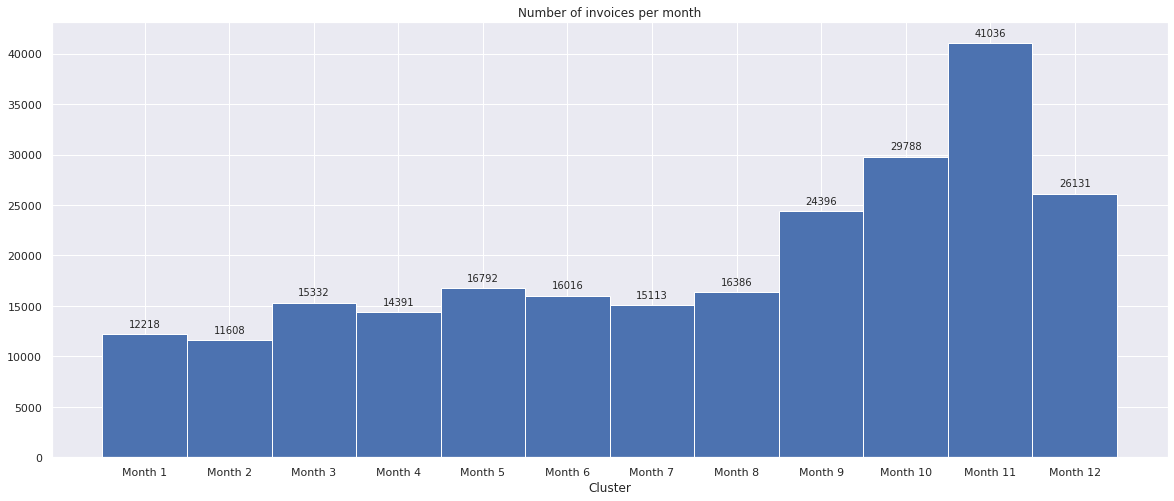

In [107]:
# Plotting graph for buying pattern across different months in cluster 0
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [108]:
# customers buying pattern in different year
temp['Year'] = cluster0[cluster0['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

2010.0    13851
2011.0    12280
Name: Year, dtype: int64

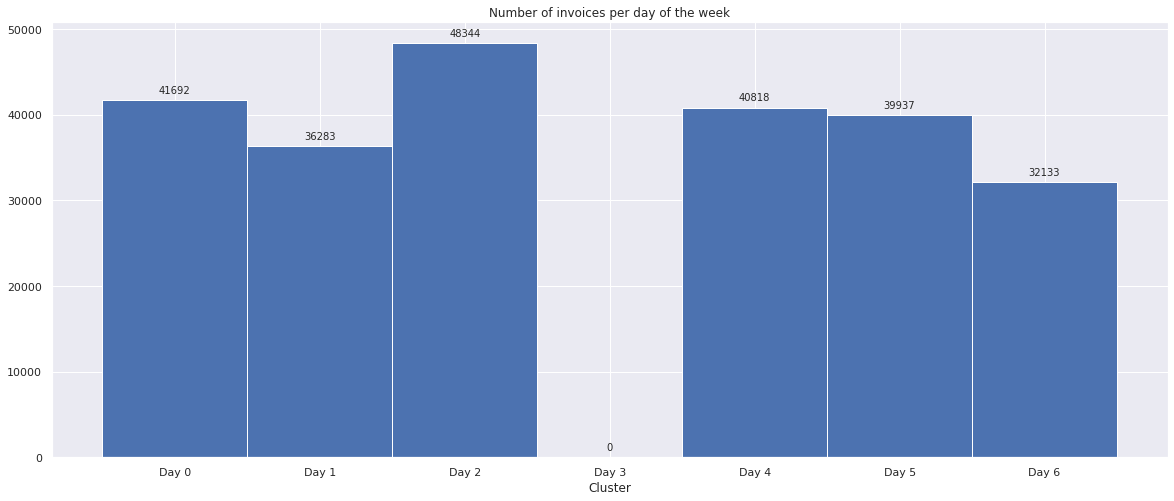

In [109]:
# Plotting Graph for customers buying pattern in different year
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day_of_week'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

## Cluster 1 Analysis

In [110]:
# Getting rows with cluster 1
segmentation[segmentation['ClusterNo']==1]

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
5,12821.0,214,6,92.72,111,3,5.365976,1.791759,4.529584,1
7,12823.0,74,5,1759.50,214,7,4.304065,1.609438,7.472785,1
8,12824.0,59,25,397.12,222,6,4.077537,3.218876,5.984239,1
12,12829.0,336,11,293.00,111,3,5.817111,2.397895,5.680173,1
14,12831.0,262,9,215.05,111,3,5.568345,2.197225,5.370871,1
...,...,...,...,...,...,...,...,...,...,...
3856,18277.0,58,8,110.38,211,4,4.060443,2.079442,4.703929,1
3857,18278.0,73,9,173.90,211,4,4.290459,2.197225,5.158480,1
3858,18280.0,277,10,180.60,111,3,5.624018,2.302585,5.196285,1
3859,18281.0,180,7,80.82,111,3,5.192957,1.945910,4.392224,1


In [111]:
# reset index of merge dataframe
temp = merge_df.reset_index()

# customer id of cluster 1
cust1 = list(temp[temp['ClusterNo']==1]['CustomerID'])

# Cluster 1 info
cluster1 = merge_df[merge_df['CustomerID'].isin(cust1)]
cluster1[['Quantity', 'UnitPrice','Amount_spent', 'Frequency', 'Recency'
         , 'Monetary']].mean()

Quantity         10.837983
UnitPrice         3.247344
Amount_spent     16.996090
Frequency        37.672778
Recency         134.643367
Monetary        447.406161
dtype: float64

In [112]:
cluster1.describe()

,CustomerID,Recency,Frequency,Monetary,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,Quantity,UnitPrice,Amount_spent,Year,Month,Day,Hour,Minutes,UK
count,48927.000000,48927.000000,48927.000000,48927.000000,48927.00000,48927.000000,48927.000000,48927.000000,48927.0,48927.000000,48927.000000,48927.00000,48927.000000,48927.000000,48927.000000,48927.000000,48927.000000,48927.0
mean,15616.692235,134.643367,37.672778,447.406161,5.90355,4.555242,3.417593,5.909056,1.0,10.837983,3.247344,16.99609,2010.905369,7.226501,15.117706,12.809471,29.892411,1.0
std,1569.990835,97.215826,23.240929,293.106317,1.37912,0.934533,0.703425,0.638956,0.0,73.565524,12.484411,40.13542,0.292707,3.469525,8.686660,2.331305,17.195162,0.0
min,12821.000000,1.000000,1.000000,1.000000,3.00000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.00000,2010.000000,1.000000,1.000000,7.000000,0.000000,1.0
25%,14231.000000,52.000000,20.000000,237.070000,5.00000,3.951244,2.995732,5.468355,1.0,2.000000,1.250000,4.68000,2011.000000,4.000000,8.000000,11.000000,15.000000,1.0
50%,15636.000000,112.000000,32.000000,378.200000,6.00000,4.718499,3.465736,5.935423,1.0,4.000000,1.950000,11.80000,2011.000000,8.000000,15.000000,13.000000,30.000000,1.0
75%,16965.000000,208.000000,51.000000,597.090000,7.00000,5.337538,3.931826,6.392068,1.0,12.000000,3.750000,17.70000,2011.000000,10.000000,22.000000,14.000000,45.000000,1.0
max,18282.000000,365.000000,123.000000,4055.720000,9.00000,5.899897,4.812184,8.307884,1.0,12540.000000,2033.100000,3202.92000,2011.000000,12.000000,31.000000,20.000000,59.000000,1.0


In [113]:
# Top products brought by cluster 1 customers 
cluster1['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    344
REGENCY CAKESTAND 3 TIER              271
ASSORTED COLOUR BIRD ORNAMENT         239
PARTY BUNTING                         232
REX CASH+CARRY JUMBO SHOPPER          204
NATURAL SLATE HEART CHALKBOARD        164
BAKING SET 9 PIECE RETROSPOT          156
HEART OF WICKER SMALL                 152
HEART OF WICKER LARGE                 148
SET OF 3 CAKE TINS PANTRY DESIGN      148
Name: Description, dtype: int64

In [114]:
# Customer aggregation for rfm score of cluster 1
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster1_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)


# distribution of rfm score in cluster 1
cluster1_grouped['RFMScore'].value_counts()

10    394
9     359
12    345
11    325
8     267
7      42
6       3
Name: RFMScore, dtype: int64

In [115]:
# buying pattern across different months in cluster 1
cluster1['Month'].value_counts()

10    6457
11    6056
12    4986
9     4745
3     4550
6     3632
5     3561
7     3465
4     3203
2     3027
1     2640
8     2605
Name: Month, dtype: int64

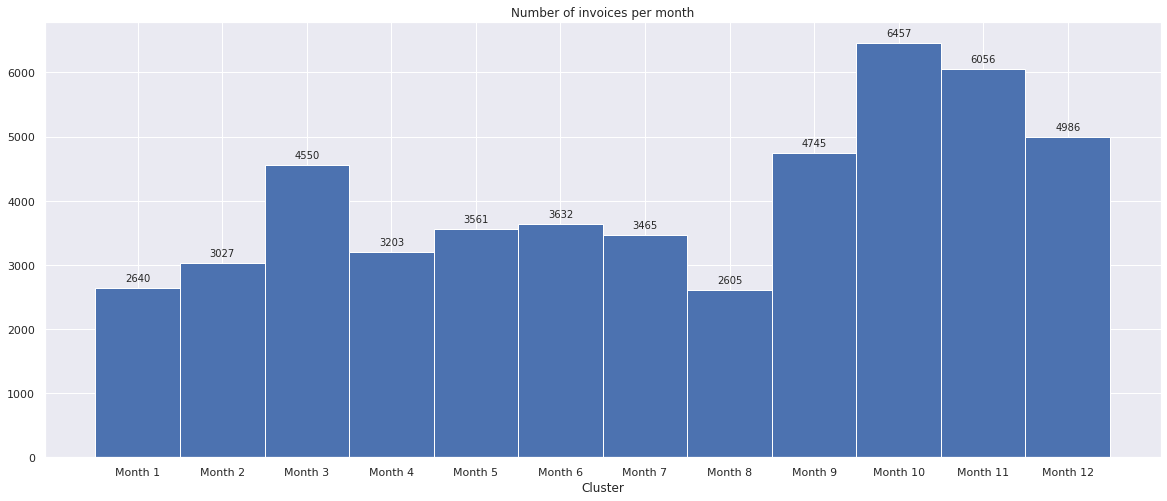

In [116]:
# Plotting graph for buying pattern across different months in cluster 1
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster1['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [117]:
# customers buying pattern in different year
temp['Year'] = cluster1[cluster1['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

2010.0    4630
2011.0     356
Name: Year, dtype: int64

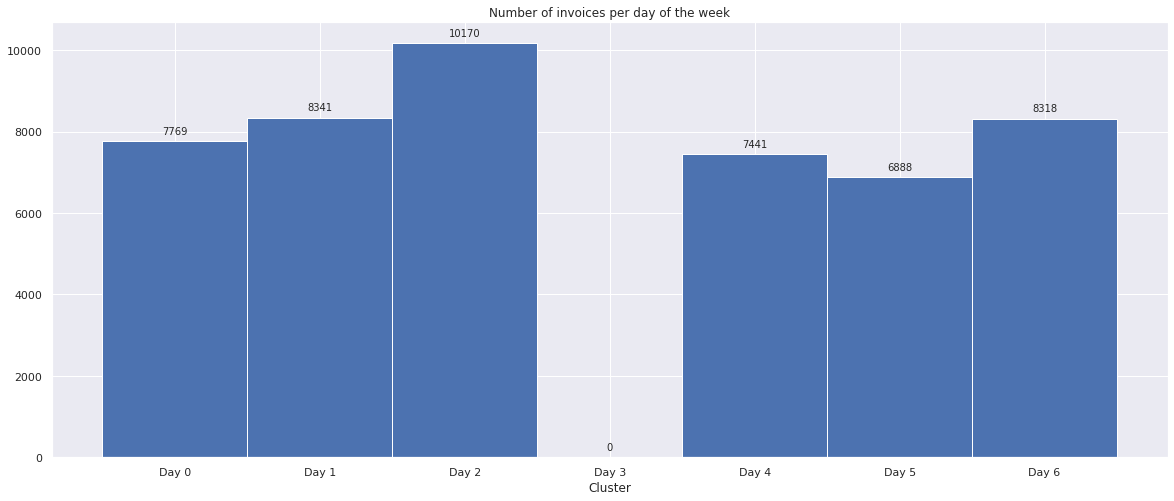

In [118]:
# Plotting Graph for customers buying pattern in different year
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster1['Day_of_week'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

## Conclusion

-  We have got 2 clusters by applying k means algorithim
-  So the customers got segmented into 2 clusters
- Online Retail Customer marketing team can now use different approaches to acquire the customers



### Cluster 0

Key figures:

- Frequency : 28.68
- Recency : 230
- Monetary : 3070
- RFM Score : 10.71

Top 10 Products

- WHITE HANGING HEART T-LIGHT HOLDER    339
- REGENCY CAKESTAND 3 TIER              268
- ASSORTED COLOUR BIRD ORNAMENT         235
- PARTY BUNTING                         229
- REX CASH+CARRY JUMBO SHOPPER          202
- NATURAL SLATE HEART CHALKBOARD        161
- BAKING SET 9 PIECE RETROSPOT          155
- HEART OF WICKER SMALL                 150
- SET OF 3 CAKE TINS PANTRY DESIGN      147
- HEART OF WICKER LARGE                 146

### Cluster 1 

Key figures:

- Frequency : 37.67

- Recency : 134.64

- Monetary : 447.40

- RFM Score : 5.90

Top 10 Products:
- WHITE HANGING HEART T-LIGHT HOLDER    344
- REGENCY CAKESTAND 3 TIER              271
- ASSORTED COLOUR BIRD ORNAMENT         239
- PARTY BUNTING                         232
- REX CASH+CARRY JUMBO SHOPPER          204
- NATURAL SLATE HEART CHALKBOARD        164
- BAKING SET 9 PIECE RETROSPOT          156
- HEART OF WICKER SMALL                 152
- HEART OF WICKER LARGE                 148
- SET OF 3 CAKE TINS PANTRY DESIGN      148